# Statistics on social network layers

### In this notebook I will focus on some of the most important statistics regarding social networks, these statistics are:

- Modularity ==> s a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities).
- Transitivity ==>  A triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties.
- Small-world property ==> A network is a small-world if its average shortest path (L) between nodes grows proportionally to log N or slower
- Positive degree assortativity ==> Degree assortativity quantifies the tendency of nodes to connect to other nodes of similar degree.


## Initialization

Initializing the network so the statistics of the network can be calculated

In [42]:
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig
import pandas as pd
import leidenalg as la
import numpy as np
optimiser = la.Optimiser()

In [167]:
df1 = pd.read_csv('../Data/NW_data2/overlap.csv')
df2 = pd.read_csv('../Data/NW_data2/hh_test.csv')
df3 = pd.read_csv('../Data/NW_data2/buren_test.csv')
df4 = pd.read_csv('../Data/NW_data2/werkschool_test.csv')
# df = pd.read_csv('../overlap.csv')
# Data\NW_data2\huishouden_nw_barabasi=0.csv

In [168]:
df = pd.concat([df1, df2,df3, df4])

In [169]:
G = nx.from_pandas_edgelist(df, 'source_id', 'destination_id' ,create_using=nx.DiGraph())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [170]:
tuples = [tuple([a, b]) for a, b in zip(df['source_id'], df['destination_id'])]
# Gm = igraph.Graph.TupleList(tuples, directed = True, edge_attrs = ['weight'])

In [84]:
df

,source_id,destination_id,source_group,destination_group
0,16,216,0,0
1,18,2437,0,0
2,27,3725,0,0
3,58,1544,0,0
4,64,2776,0,0
...,...,...,...,...
1381705,816802,860808,195,237
1381706,816560,860860,195,237
1381707,817414,860827,195,237
1381708,814788,860809,195,237


In [171]:
Gm = ig.Graph.TupleList(tuples, directed = True)


In [178]:
edges = Gm.ecount()
nodes = Gm.vcount()

## Checking for modularity, transitivity, small-world property and degree assortativity for each layer

### Results modularity:

- Family: 0.6711623336876632
- Neighbours: 0.884774334375547
- Work/school:0.3831499680672851
- Household:999990245801818
- Combined:  0.34357482848028703
- Random: -1.7422323611572512e-06

### Results transitivity

- Family: 0.00173
- Neighbours: 0.3498588104708938
- Work/school: 0.000259283371100701
- Household: 1
- Combined: 0.09609942952800941
- Random:5.22374458907123e-06

### Results small-world property

- Family: average shortest path = 6.9729, inf = True
- Neighbours: 5.1827
- Work/school: 4.116
- Household: inf
- Combined: 3.7043
- Random: inf 

### Results degree assortativity

- Family:0.41728363400785057
- Neighbours: 0.09320552506500217
- Work/school: 0.18906038946967274
- Household: 1
- Combined: 0.12087295309397249
- Random: 0.0020899405101452075

In [173]:
partition = la.find_partition(Gm, la.ModularityVertexPartition)

In [188]:
np.log(np.log(861000))

2.6149000043041646

In [174]:
Gm.modularity(partition)

0.34357482848028703

In [175]:


Gm.transitivity_undirected()

0.09609942952800941

In [176]:
# Calsulating the shortest path (100 nodes)

rn = np.random.randint(nodes, size=(100,2))



x = rn[:,0]

y = rn[:,1]

print(x,y)


sp = Gm.shortest_paths(x, y, mode='in')



[ 74216 308975 444113 596804 308149 647053 807971 462235 225208 738453
 547095 542124 459855 616353 650129 289759 741411 186118 326996 103804
 528214 549025 283810  64232 259528 177471 124306 155639   1619 459459
 653085 146439  79132 114796 428026  79096 259059 146614 123329 792827
 764062 149867 423695 782312 498029  27823 825857 154721 195365 306359
 242479 124925 622980 444074 484842 359237 843949 741693 762340 391795
 374885 675509 538274 803024  37264 731163 112280 282989 746277 192919
 476974 243019 225447 624246 765375 326651  48004  62363 858927 549007
 325625 127075 852066 690692 785352 102508  91425 803405 434619 854422
 605587 252967 144484 312808 262480 497389 793425 492893      0   5047] [316602 817008 439940 378037 792711 101495 137601 739512 222079   5858
 540574 794380 549399  20355 551245 184107 195822 182942 675945 827488
  62641 300552 483319 819620 548335  27163 348198 421071 716172 455824
  89742 744384  13063 708622 107684 299124 261153 472802 546765 177656
  839

In [186]:
 

sp = np.array(sp).flatten()

sp

# # sp = list(sp[sp == np.inf] = 0.0)

# sp = list(sp).remove(np.inf)



np.mean(sp)


3.7043

In [177]:
Gm.assortativity_degree()

0.12087295309397249

In [179]:
p = nodes/((861000 * (861000 - 1))/2)

In [180]:
p

2.3207976007785216e-06

In [181]:
gm_ER = ig.Graph.Erdos_Renyi(861000, p)

In [182]:
gm_ER.transitivity_undirected()

5.22374458907123e-06

In [12]:
gm_WS = ig.Graph.Watts_Strogatz(1, 861000, 100, p)

In [13]:
gm_WS.transitivity_undirected()

0.7461553592838793

In [15]:
len(gm_WS.get_edgelist())

86100000

In [16]:
len(Gm.get_edgelist())

5985200

In [189]:
random_partition = gm_ER.community_leiden()

In [190]:
gm_ER.modularity(random_partition)

-1.7422323611572512e-06

In [191]:
# Calsulating the shortest path (100 nodes)

rn = np.random.randint(nodes, size=(100,2))



x = rn[:,0]

y = rn[:,1]

print(x,y)


sp = gm_ER.shortest_paths(x, y, mode='in')


[754677 245753 153542 624938 706261 597863 463776  52315 326051 771848
 443126 110910 171839 307167 759374 839451 228544   2743 152511 462799
 794413 314805 845903 117823 572315 311150  88263 129795  30670 521681
 629109 105850 306960 553916 827801 536203 312125 234166 486759 256738
 820376 312951 290832 658205 451397 155994 707776  36666 747948 112192
 648784 400292 601308 400493 351631 434908 195059 579013 235757  95240
 782624 496907 203580 471138 200683 450480 122145 570660 156881 590537
 608848 171509 736296  76536 208324 844318 426327 396313 257226 223558
  98994 257944 794342 428026 298813 114228 212184 646611 681797 769792
 123532 216881 757491 712594 681305 222116 390974 814861 587760 419203] [672736 536487   5713 247954 308588 337667 843219 279914 727861 477584
 508072 591628 517682 760146 690067 402661 110036 850052 763398 665460
 807711 270805 337837 543138 657908 269372 674918 693514 176416  99523
 200447 774536 586836 380289 261969 246500  72943 464471  97413 462343
 2041

In [196]:
gm_ER.assortativity_degree()

0.0020899405101452075

In [55]:
np.log(861000)

13.665849783409868

## Looking at different indexes in the new social network

## Other dataset

Checking the degree distribution of calls + bt contact in Copenhagen
https://figshare.com/articles/dataset/The_Copenhagen_Networks_Study_interaction_data/7267433/1?file=14039048

In [62]:
df = pd.read_csv('../Data/other/bt_symmetric.csv')
df = df[(df['user_b'] != 0) & (df['user_b'] != -1) & (df['user_b'] != -2)]
tuples = [tuple([a, b]) for a, b in zip(df['user_a'], df['user_b'])]

In [80]:
df = pd.read_csv('../Data/other/calls.csv')
tuples = [tuple([a, b]) for a, b in zip(df['caller'], df['callee'])]

In [79]:
df

,timestamp,caller,callee,duration
0,184,300,301,121
1,3920,512,299,670
2,5623,301,300,504
3,9252,401,457,-1
4,15466,512,0,5
...,...,...,...,...
3595,2414934,706,401,78
3596,2415585,218,382,48
3597,2416059,561,631,13
3598,2416368,323,392,4


In [81]:
Gm_call = ig.Graph.TupleList(tuples, directed = True)


(array([414.,  68.,  31.,  11.,   3.,   7.,   0.,   0.,   1.,   1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

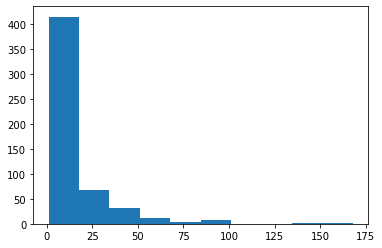

In [82]:
plt.hist(Gm_call.degree())

In [83]:
Gm_call.transitivity_undirected()

0.1836734693877551